In [1]:
%load_ext autoreload
%autoreload 2

import sys
 
# setting path
sys.path.append('../read_data/')
sys.path.append('../')

In [2]:
from getData import read_data, resize_images_and_labels

from bbox_utils import convert_to_box_form

In [3]:
from classification_loss import SSDLoss

In [4]:
# import tensorflow as tf

In [5]:
# box_coordinates = tf.concat([   boxes[:, :, :2] - boxes[:, :, 2:] / 2, 
#                                     boxes[:, :, :2] + boxes[:, :, 2:] / 2 ], 
#                                     axis = 2)

# box_coordinates

In [6]:
# boxes = tf.constant([
#     [50 / 300, 70 / 300, 50 / 300, 40 / 300]
# ], tf.float32)

# boxes

In [7]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [69]:
file_name = '07600_RV_420_459_045'
file_name = '07600_RV'

image_path = '/home/usman/workspace/fisheye_images/train_images/'
label_path = '/home/usman/workspace/fisheye_images/train_labels'

image_path = label_path = '/home/usman/workspace/SSDModel/image_augmentations/'


In [70]:
image, label = read_data(file_name, image_path, label_path)

# image, label = resize_images_and_labels(image, label)

In [71]:
300 * 1100 / 1200

275.0

In [72]:
label

[]

In [73]:
image.shape

(966, 1280, 3)

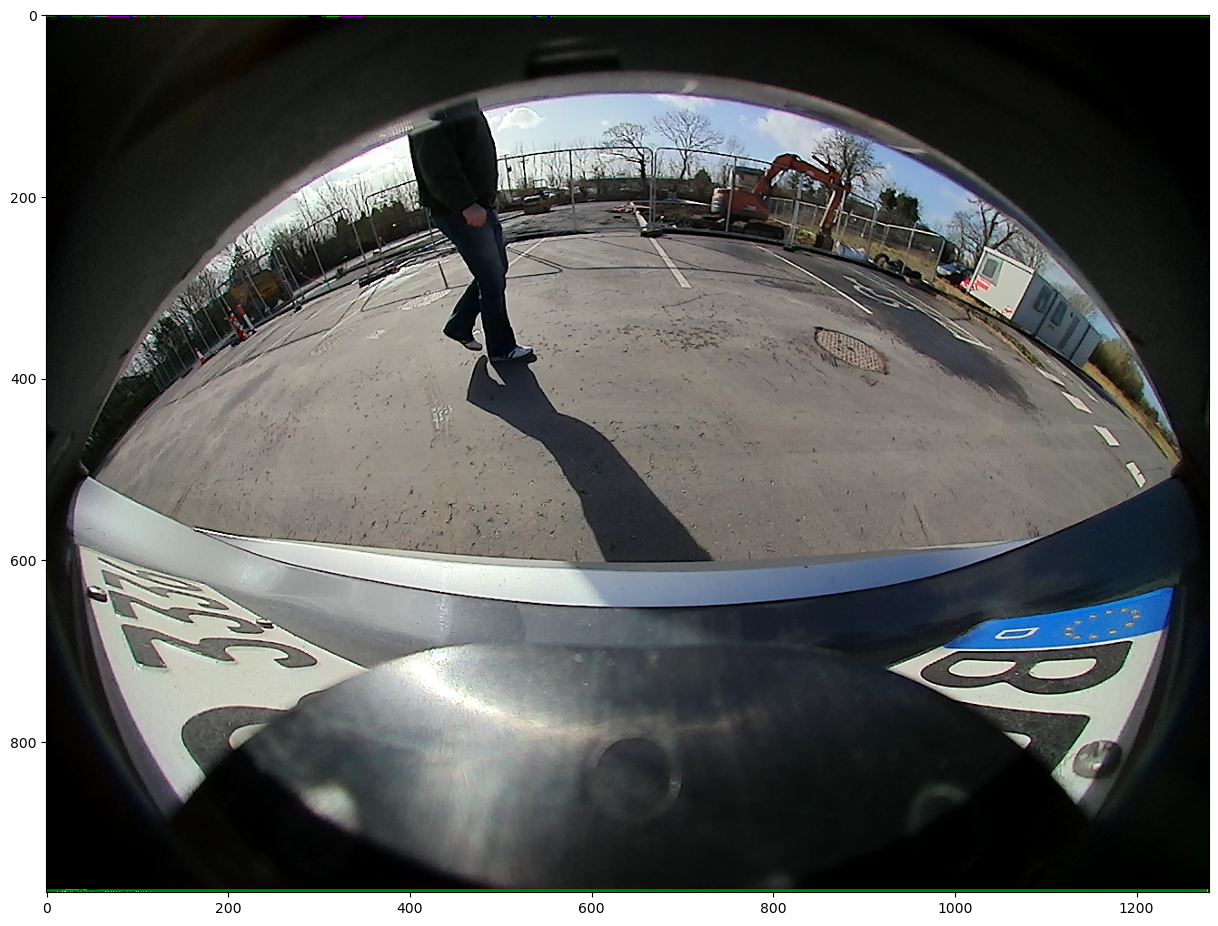

In [74]:
plt.figure(figsize=(15, 15))

for _, x_min, y_min, x_max, y_max in label:
    print(x_min, y_min, x_max, y_max)
    image = cv2.rectangle(image, (x_min, y_min),
                          (x_max, y_max), (0, 0, 255), 1)

plt.imshow(image)

In [75]:
( 118 / 2 ) / 300

0.19666666666666666

In [76]:
image.shape

(966, 1280, 3)

In [77]:
from getData import read_data
from bbox_utils import *
from dataGenerator import DataGenerator

In [78]:
import glob

In [79]:
file_names = glob.glob('/home/usman/workspace/fisheye_images/train_images/*.png')

In [80]:
min_width = float('inf')

for file in file_names:
    image = cv2.imread(file)
    width = image.shape[0]
    height = image.shape[1]
    if width != height:
        file_name = file
        break

print(file_name)

/home/usman/workspace/fisheye_images/train_images/04718_MVL.png


In [81]:
file_names = glob.glob('/home/usman/workspace/fisheye_images/train_labels/*.txt')

In [82]:
for file in file_names:
    f = open(file)
    line = f.readlines()
    if len(line) == 0:
        print(file)
        break

/home/usman/workspace/fisheye_images/train_labels/07600_RV.txt


In [83]:
for file in file_names:
    f = open(file)
    line = f.readlines()
    for l in line:
        _, _, x_min, y_min, x_max, y_max = l.split(',')
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
        if (x_max - x_min) <= 5 or (y_max - y_min) <= 5:
            print(file)

In [84]:
file_names = glob.glob('/home/usman/workspace/fisheye_images/train_images/*.png')

In [87]:
# list_IDs = [f.split('/')[-1].replace('.png', '') for f in file_names]

list_IDs = ['07600_RV']

In [88]:
list_IDs[:8]

['07600_RV']

In [89]:
feature_map_shapes = [37, 18, 9, 5, 3, 1]
aspect_ratios = [
    [1, 2, 0.5],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 0.5],
    [1, 2, 0.5]
]
number_of_feature_maps = 6

prior_boxes = generate_default_boxes(feature_map_shapes, number_of_feature_maps, aspect_ratios)
boxes = convert_to_box_form(prior_boxes)

In [112]:
dg = DataGenerator(list_IDs, 
                   label_path,
                   image_path, 
                   prior_boxes,
                   boxes,
                  batch_size=1)

In [113]:
loss = SSDLoss()

In [114]:
for d in dg:
    holdout = d
#     loc_los = loss.localization_loss(holdout[1][0], pred[0])
#     conf_loss = loss.confidence_loss(holdout[1][1], pred[1])
    print(tf.reduce_sum(holdout[1][1][:, :, 1:], axis = 1))
#     print( 'loc_los: ', tf.reduce_sum(loc_los, axis = 1) )
#     print( 'conf_loss: ', tf.reduce_sum(conf_loss, axis = 1) )
#     print(d)
    break

966 1280
[[0, 0, 0, 300, 300]]
tf.Tensor([[0. 0. 0. 0. 0.]], shape=(1, 5), dtype=float32)


In [131]:
300 * 300 / 289

311.4186851211073 / 300

1.0380622837370241

In [116]:
holdout[1][0][0].shape

TensorShape([8096, 5])

In [117]:
list_IDs[:100]

['07600_RV']

In [123]:
turf.numpy()

array([0.        , 0.        , 0.18989867, 0.18989867, 1.        ],
      dtype=float32)

In [129]:
print( ( 0.5 - 0.5 ) / 0.82704294 )
print(( 0.5 - 0.5 ) / 0.82704294 )
print( np.log(1 / 0.82704294 ) )
print( np.log(1 / 0.82704294 ) )

0.0
0.0
0.18989866269452788
0.18989866269452788


In [125]:
print(boxes[i].numpy())
print(prior_boxes[i].numpy())

[0.08647853 0.08647853 0.91352147 0.91352147]
[0.5        0.5        0.82704294 0.82704294]


In [126]:
# 0, 0, 191, 83

convert_to_centre_dimensions_form(tf.constant([
    [
        [0 / 300, 0 / 300, 300 / 300, 300 / 300]
    ]
], tf.float32))

<tf.Tensor: shape=(1, 1, 4), dtype=float32, numpy=array([[[0.5, 0.5, 1. , 1. ]]], dtype=float32)>

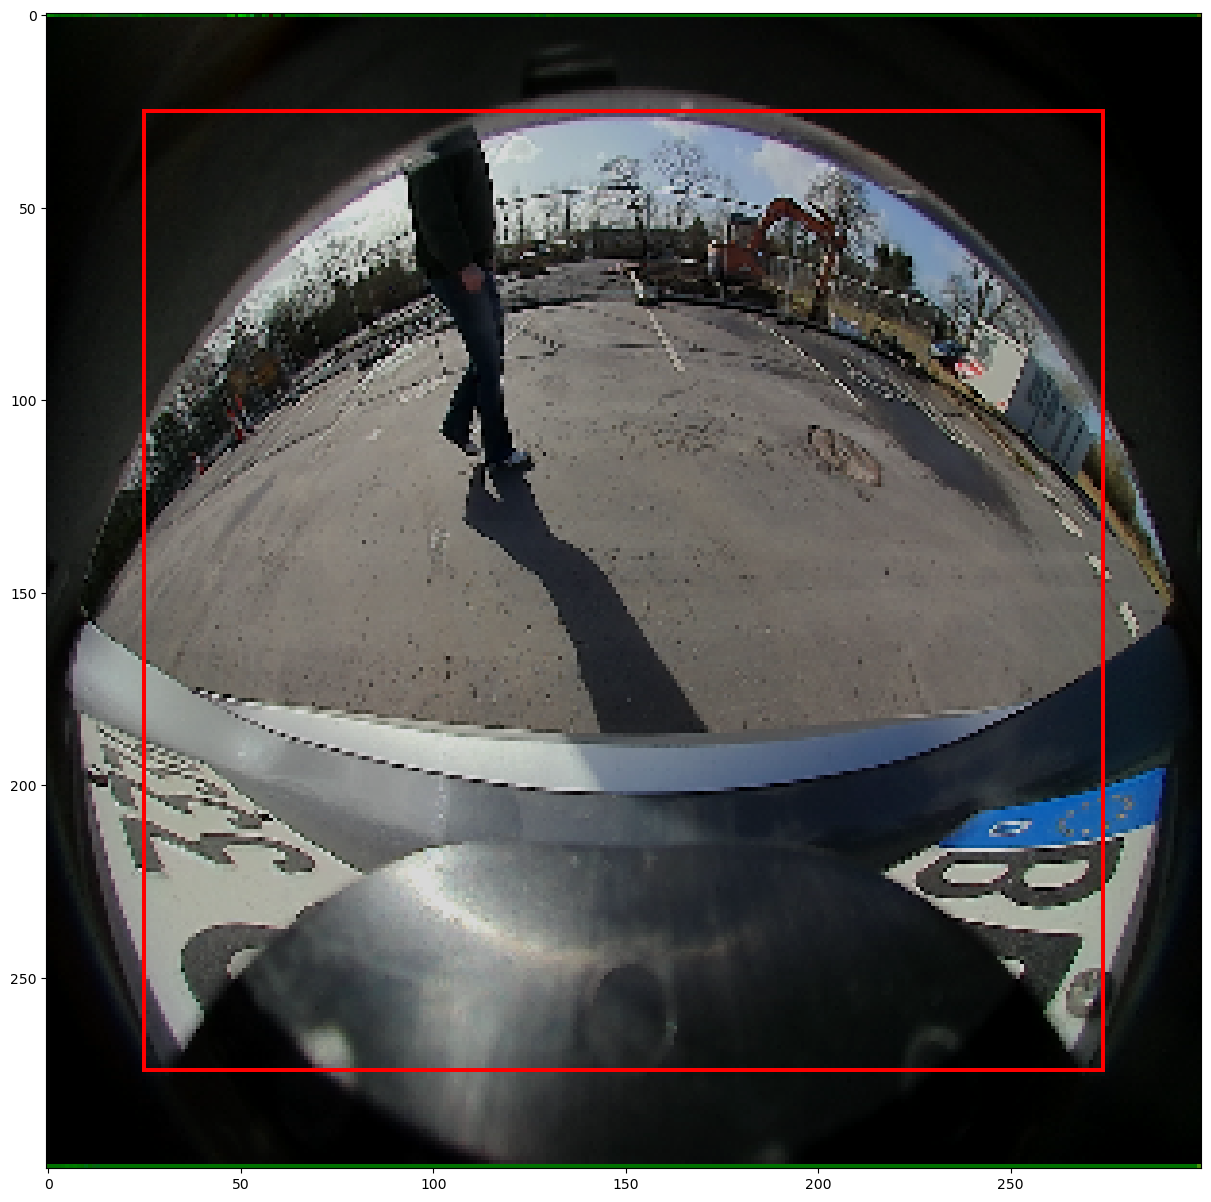

In [122]:
image = np.array(holdout[0][0] * 255, np.int32)

plt.figure(figsize=(15, 15))
counter = 0

for i, turf in enumerate(holdout[1][0][0]):
    
    _, _, _, _, xfactor = turf.numpy()
    
    if xfactor == 1.0:
        start_x, start_y, end_x, end_y = boxes[i].numpy() * 300

        start_x, start_y, end_x, end_y = int(start_x), int(start_y), int(end_x), int(end_y)

        cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color=(255,0,0), thickness = 1)
        counter+=1
    if counter > 0:
        break


plt.imshow(image)

In [ ]:












# import numpy as np
# import keras

# from getData import read_data, label_dimensions_to_point_form
# from bbox_utils import match_priors_with_gt

# class DataGenerator(keras.utils.Sequence):
#     def __init__(self, list_IDs,
#                 label_folder_path,
#                 image_folder_path, 
#                 prior_boxes,
#                 prior_boxes_point_form,
#                 batch_size = 8, 
#                 n_classes = 11, 
#                 image_height = 300,
#                 image_width = 300,
#                 shuffle = True):
#         self.list_IDs = list_IDs
#         self.batch_size = batch_size
#         self.n_classes = n_classes
#         self.shuffle = shuffle
#         self.label_folder_path = label_folder_path
#         self.image_folder_path = image_folder_path
#         self.prior_boxes = prior_boxes
#         self.prior_boxes_point_form = prior_boxes_point_form
#         self.image_height = image_height
#         self.image_width = image_width
#         self.on_epoch_end()

#     def __len__(self):
#         return int( np.floor( len(self.list_IDs) / self.batch_size ) )

#     def __getitem__(self, index):
#         indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

#         list_IDs_temp = [self.list_IDs[k] for k in indexes]

#         X, y = self.__data_generation(list_IDs_temp)

#         return X, y

#     def on_epoch_end(self):
#         self.indexes = np.arange(len(self.list_IDs))

#         if self.shuffle:
#             np.random.shuffle(self.indexes)
        
#     def __data_generation(self, list_IDs_temp):

#         X = np.empty([self.batch_size, self.image_height, self.image_width, 3])
#         y_label = None
#         y_loc = None

#         for i, file_name in enumerate(list_IDs_temp):
#             image, labels = read_data(  file_name, 
#                                         self.image_folder_path, 
#                                         self.label_folder_path
#                                      )
            
#             image, labels = resize_images_and_labels(image, labels, self.image_height, self.image_width)

#             X[i,] = image

#             labels = label_dimensions_to_point_form(labels, self.image_height, self.image_width)

#             gt_labels = [l[0] for l in labels]
#             gt_boxes = [l[1:] for l in labels]
            
#             offset, one_hot_encoded_label = match_priors_with_gt(   
#                                                             self.prior_boxes, 
#                                                             self.prior_boxes_point_form, 
#                                                             tf.constant([gt_boxes]), 
#                                                             tf.constant([gt_labels]), 
#                                                             number_of_labels = self.n_classes, 
#                                                             threshold = 0.5)

#             if y_label == None:
#                 y_label = one_hot_encoded_label
#                 y_loc = offset
#             else:
#                 y_label = tf.concat([y_label, one_hot_encoded_label], axis = 1)
#                 y_loc = tf.concat([y_loc, offset], axis = 1)

#         return X, [y_loc, y_label]

In [ ]:
holdout

In [ ]:
# holdout[1][0][:, :8732, :4]

In [ ]:
i = 0
for gt in holdout[1][0][0, :8732, :4]:
    print(gt.numpy())
    break

In [ ]:
def yoloFormattocv(x1, y1, x2, y2, H, W):
    bbox_width = x2 * W
    bbox_height = y2 * H
    center_x = x1 * W
    center_y = y1 * H

    voc = []

    voc.append(center_x - (bbox_width / 2))
    voc.append(center_y - (bbox_height / 2))
    voc.append(center_x + (bbox_width / 2))
    voc.append(center_y + (bbox_height / 2))

    return [int(v) for v in voc]

In [ ]:
# 0.0022806525 0.010877192 3.7252903e-09 0.02666666

# gt.numpy()

prior_boxes[i, :].numpy()

In [ ]:
image_width = 300
image_height = 300

color = (255, 0, 0)

plt.figure(figsize=(15, 15))

image_number = 0

image = np.array(holdout[0][image_number] * 255, np.int32)

i = 0
for gt in holdout[1][0][image_number, :, :4]:
    c_x, c_y, width, height = gt.numpy()
    
    if c_x != 0 and c_y != 0:
        c_x, c_y, width, height = gt.numpy() + prior_boxes[i, :].numpy()
        print(c_x, c_y, width, height)
        start_x, start_y, end_x, end_y = yoloFormattocv(c_x, c_y, width, height, 300, 300)
        
#         print()
        
#         start_x, start_y, end_x, end_y = boxes[i, :].numpy()
    
#         start_x, start_y, end_x, end_y = int(start_x * image_width), int(start_y * image_height), int(end_x * image_width), int(end_y * image_height)

        image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color, thickness = 1)
    i+=1

plt.imshow(image)

In [ ]:
start_x, start_y, end_x, end_y 

In [ ]:
file_names = glob.glob('/Users/usmanr/workspace/fisheye_images/box_2d_annotations/*.txt')

In [ ]:
labels = []
label_names = []

map_labels = {}

for file_name in file_names:
    f = open(file_name)
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(',')
        map_labels[line[0]] = line[1]
#         print(line)
#         break

In [ ]:
map_labels

In [ ]:
label_names

In [ ]:
len(label)